In [359]:

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
# btc_15m_data_2018_to_2025.csv
# df = pd.read_csv('bitcoin.csv')
df = pd.read_csv('ETH-USD (1).csv', delimiter=',', index_col='Date')
df = df.dropna()
# df.count(df.iloc['null'])
# df.sort_values(by='Date')


<Axes: xlabel='Date'>

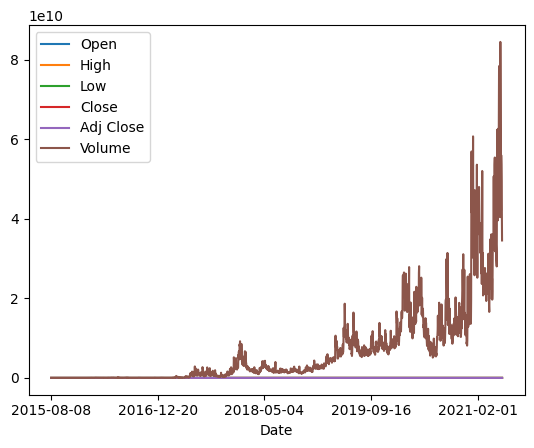

In [360]:
df.plot()

In [361]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0
2015-08-12,1.058750,1.289940,0.883608,1.217440,1.217440,2150620.0


In [362]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2.116000e+03
mean,345.996625,359.900218,330.685773,347.228301,347.228301,6.653876e+09
std,540.224970,566.906229,510.258962,542.654011,542.654011,1.035570e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,13.281750,13.855525,13.032900,13.325150,13.325150,3.605552e+07
50%,194.705276,201.004501,187.054772,194.787369,194.787369,2.021149e+09
75%,371.200424,383.609542,363.656357,371.154121,371.154121,9.060469e+09
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10


In [363]:

# splitted = df['Date'].str.split('-', expand=True)

# df['year'] = splitted[0].astype('int')
# df['month'] = splitted[1].astype('int')
# df['day'] = splitted[2].astype('int')
# df['is_quarter_end'] = np.where(df['month']%3==0,1,0)



df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

    # Convert the 'Date' column to datetime objects
# df['Date'] = pd.to_datetime(df['Date']) 
featureColumns = ['open-close', 'low-high']

features = df[featureColumns]
target = df['target']

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)

X_train = features[:300]
y_train = target[:300]

X_test = features[301:]
y_test = target[301:]

# print(X_test)


len(features)

2116

In [364]:
# 3. Initialize the Perceptron model
# random_state is set for reproducibility
model = Perceptron(eta0=0.01, max_iter=3000, )

# 4. Train the Perceptron model using the training data
model.fit(X_train, y_train)


# # 5. Make predictions on the test set
y_pred = model.predict(X_test[:])

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5129


In [365]:


dlrsAmount = 1000
btAmount = 0.5
closePrice = 0
list = []
i = 0
for index, row in df[-200:-1].iterrows():

    pr = model.predict([row[featureColumns]])
    i = i + 1
    predicted = pr[:][0]
    print(1111, predicted)
    closePrice = row['Close']
    if(predicted == 1):
        if dlrsAmount:
            list.append(dlrsAmount)
            
            btAmount = btAmount + dlrsAmount / closePrice
         
            dlrsAmount = 0
    else:
        if btAmount:
            dlrsAmount = btAmount * closePrice
            btAmount = 0
  
    
df = pd.DataFrame(list)

# print(df.describe())

# print('dlrsAmount', dlrsAmount)
# print('btAmount', btAmount)
# print('btAmount * dlrsAmount', btAmount * closePrice)

1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1
1111 1

In [366]:
df

,0
0,1000
